__(Clasificación multiclase) Dada una imagen se desea responder la siguiente pregunta: ¿A cuál de los 10 dígitos corresponde la imagen?__

In [2]:
import pandas as pd
from sklearn.model_selection import train_test_split

In [ ]:
# Carga de datos.
Data = 'TMNIST_Data.csv'
df = pd.read_csv(Data)

In [ ]:
# Variables explicativas (X) y variable a explicar (Y).
x = df.iloc[:, 2:].values  # 784 píxeles de cada imagen.
y = df.iloc[:, 1].values   # Dígitos.

__a. Separar el conjunto de datos en desarrollo (dev) y validación (held-out).__

In [ ]:
# Separar los datos en:
# - Conjunto de entrenamiento (x_dev e y_dev).
# - Conjunto de validación o held-out (x_held_out y y_held_out).
x_dev, x_held_out, y_dev, y_held_out = train_test_split(x, y, test_size=0.2, random_state=42)

__b. Ajustar un modelo de árbol de decisión. Probar con distintas profundidades (entre 1 y 10).__

In [7]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

In [ ]:
# Función para ejecutar modelos de árboles de decisión en distintas profundidades.
def train_decision_tree(x_train: pd.DataFrame, y_train: pd.Series, max_depth: int) -> DecisionTreeClassifier:
    
    """
    Train a decision tree classifier with a given maximum depth.
    
    Parameters:
        x_train (pd.DataFrame): Training features.
        y_train (pd.Series): Training labels.
        max_depth (int): The maximum depth of the decision tree.
    
    Returns:
        DecisionTreeClassifier: The trained model.

    """
    
    model = DecisionTreeClassifier(max_depth=max_depth, random_state=42)
    model.fit(x_train, y_train)
    return model

In [ ]:
# Entrenar modelos con diferentes profundidades.
depths = range(1, 11)  # Profundidades de 1 a 10.
accuracies = []

In [ ]:
for depth in depths:
    model = train_decision_tree(x_dev, y_dev, depth)
    y_pred = model.predict(x_dev)
    accuracy = accuracy_score(y_dev, y_pred)
    accuracies.append(accuracy)
    print(f"Depth: {depth}, Accuracy: {accuracy:.4f}")

Depth: 1, Accuracy: 0.1954
Depth: 2, Accuracy: 0.3659
Depth: 3, Accuracy: 0.5869
Depth: 4, Accuracy: 0.7980
Depth: 5, Accuracy: 0.8413
Depth: 6, Accuracy: 0.8787
Depth: 7, Accuracy: 0.9132
Depth: 8, Accuracy: 0.9401
Depth: 9, Accuracy: 0.9599
Depth: 10, Accuracy: 0.9732


In [11]:
# Encontrar la mejor profundidad
best_depth = depths[accuracies.index(max(accuracies))]
print(f"Best depth: {best_depth} with accuracy: {max(accuracies):.4f}")

Best depth: 10 with accuracy: 0.9732


__c. Realizar un experimento para comparar y seleccionar distintos árboles de decisión, con distintos hiperparámetos. Nuevamente, limitarse a usar profundidades entre 1 y 10.
Para esto, utilizar validación cruzada con k-folding. ¿Cuál fue el mejor modelo? Documentar cuál configuración de hiperparámetros es la mejor, y qué performance tiene.__

In [12]:
from sklearn.model_selection import cross_val_score
import numpy as np

In [ ]:
def evaluate_with_cross_validation(x_train: pd.DataFrame, y_train: pd.Series, max_depth_range: range) -> dict:
    
    """
    Evaluate decision trees with different depths using k-fold cross-validation.
    
    Parameters:
        x_train (pd.DataFrame): Training features.
        y_train (pd.Series): Training labels.
        max_depth_range (range): The range of max_depth values to test.
    
    Returns:
        dict: A dictionary with the best max_depth and its corresponding score.
        
    """

    best_score = 0
    best_depth = None
    
    for depth in max_depth_range:
        model = DecisionTreeClassifier(max_depth=depth, random_state=42)
        scores = cross_val_score(model, x_train, y_train, cv=5, scoring='accuracy')  # 5-fold CV
        mean_score = np.mean(scores)
        print(f"Depth: {depth}, CV Accuracy: {mean_score:.4f}")
        
        if mean_score > best_score:
            best_score = mean_score
            best_depth = depth
    
    return {'best_depth': best_depth, 'best_score': best_score}

In [ ]:
# Evaluar con k-fold cross-validation
cv_result = evaluate_with_cross_validation(x_dev, y_dev, range(1, 11))
print(f"Best depth from cross-validation: {cv_result['best_depth']} with CV accuracy: {cv_result['best_score']:.4f}")

Depth: 1, CV Accuracy: 0.1954
Depth: 2, CV Accuracy: 0.3656
Depth: 3, CV Accuracy: 0.5885
Depth: 4, CV Accuracy: 0.7948
Depth: 5, CV Accuracy: 0.8342
Depth: 6, CV Accuracy: 0.8693
Depth: 7, CV Accuracy: 0.8966
Depth: 8, CV Accuracy: 0.9140
Depth: 9, CV Accuracy: 0.9224
Depth: 10, CV Accuracy: 0.9262
Best depth from cross-validation: 10 with CV accuracy: 0.9262


__d. Entrenar el modelo elegido a partir del inciso previo, ahora en todo el conjunto de desarrollo. Utilizarlo para predecir las clases en el conjunto held-out y reportar la performance.__

In [15]:
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
def evaluate_model_on_held_out(x_train: pd.DataFrame, y_train: pd.Series, x_test: pd.DataFrame, y_test: pd.Series, best_depth: int) -> None:
   
    """
    Train the best decision tree on the full development set and evaluate it on the held-out set.
    
    Parameters:
        x_train (pd.DataFrame): Development features.
        y_train (pd.Series): Development labels.
        x_test (pd.DataFrame): Held-out features.
        y_test (pd.Series): Held-out labels.
        best_depth (int): The best max_depth determined earlier.
        
    """

    # Train the model with the best depth
    model = DecisionTreeClassifier(max_depth=best_depth, random_state=42)
    model.fit(x_train, y_train)
    
    # Make predictions on the held-out set
    y_pred = model.predict(x_test)
    
    # Evaluate accuracy
    accuracy = accuracy_score(y_test, y_pred)
    print(f"Accuracy on held-out set: {accuracy:.4f}")
    
    # Print classification report
    print("\nClassification Report:")
    print(classification_report(y_test, y_pred))
    
    # Confusion matrix
    conf_matrix = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(10, 7))
    sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=range(10), yticklabels=range(10))
    plt.title("Confusion Matrix")
    plt.xlabel("Predicted")
    plt.ylabel("True")
    plt.show()

Accuracy on held-out set: 0.9279

Classification Report:
              precision    recall  f1-score   support

           0       0.92      0.96      0.94       591
           1       0.94      0.94      0.94       570
           2       0.94      0.95      0.95       585
           3       0.87      0.92      0.89       591
           4       0.95      0.95      0.95       602
           5       0.93      0.87      0.90       615
           6       0.93      0.93      0.93       607
           7       0.94      0.95      0.94       584
           8       0.91      0.91      0.91       632
           9       0.95      0.91      0.93       603

    accuracy                           0.93      5980
   macro avg       0.93      0.93      0.93      5980
weighted avg       0.93      0.93      0.93      5980



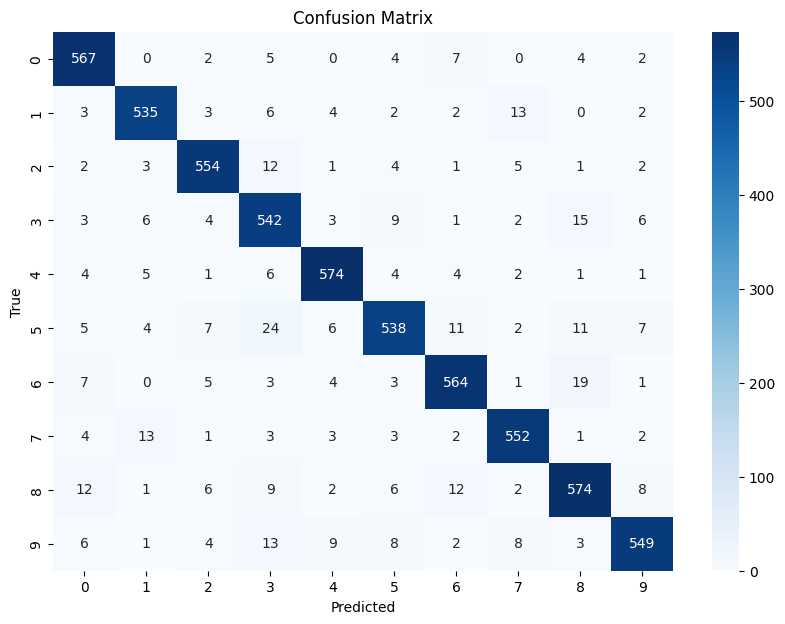

In [ ]:
# Evaluar el mejor modelo en el conjunto held-out
evaluate_model_on_held_out(x_dev, y_dev, x_held_out, y_held_out, cv_result['best_depth'])